![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(f, a, b, n=1000):
    l, h = np.linspace(a,b, num=n, endpoint=False, retstep=True)
    if n == 1:
        h = abs(b-a)
    mids = l + h/2
    return np.sum(f(mids))*h

def simpson(f, a, b, n=1000):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    if n == 1:
        h = abs(b-a)
    mids = l + h/2
    return (4*np.sum(f(mids)) + 2*np.sum(f(l)) + (f(b)-f(a))) * h/6

In [3]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `divmod` do python.

In [4]:
def F(x):
    n = np.sign(np.sin(x))
    s = divmod(x,np.pi)
    return (-1 + 2*(np.sign(s[0]%2)))*np.cos(x) + 2*abs(s[0]) + 1


In [5]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [6]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

In [7]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

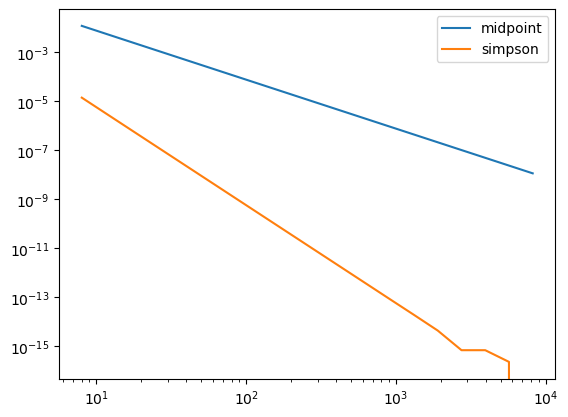

In [8]:
a, b = 0, 3
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
plt.loglog(ns, [abs(midpoint(f, a, b, n) - exact) for n in ns], label="midpoint")
plt.loglog(ns, [abs(simpson(f,a, b, n) - exact) for n in ns], label="simpson")
plt.legend()
ax = plt.gca()

In [9]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Agora, repita o gráfico para o intervalo $[0,6]$:

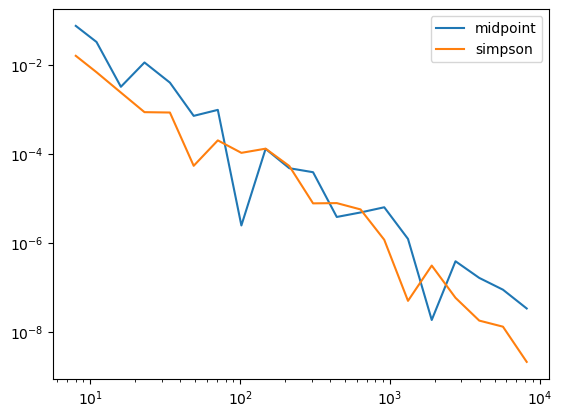

In [10]:
a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
plt.loglog(ns, [abs(midpoint(f, a, b, n) - exact) for n in ns], label="midpoint")
plt.loglog(ns, [abs(simpson(f,a, b, n) - exact) for n in ns], label="simpson")
plt.legend()
ax = plt.gca()

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Como esse gráfico é diferente do outro?

Além da ordem de grandeza ser menor, ou seja erro maior, este gráfico também apresenta diversas variações, ou descontinuidades, diferente do anterior.

Faça para mais um intervalo.

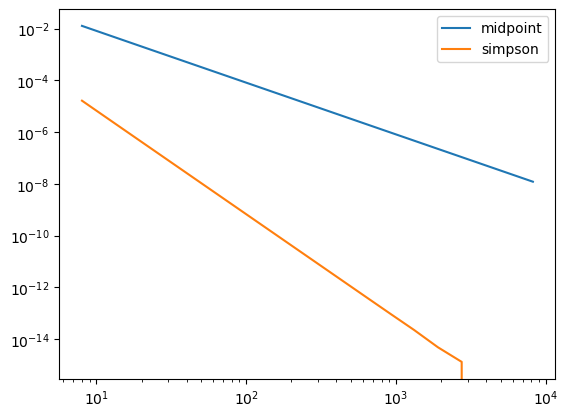

In [13]:
a, b = 0, np.pi
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
plt.loglog(ns, [abs(midpoint(f, a, b, n) - exact) for n in ns], label="midpoint")
plt.loglog(ns, [abs(simpson(f,a, b, n) - exact) for n in ns], label="simpson")
plt.legend()
ax = plt.gca()

Como isso ajuda a explicar o que você viu?

Quando não há descontinuidade dentro do intervalo, o gráfico é liso, contínuo, esse novo gráfico demonstra isso ao usar o intervalo terminado em $\pi$, evitando passar por pontos descontínuos 

## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.

In [14]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    if (x-a)*(x-b) > 0:
        return None
    m = abs((b-a)/n)
    ns = [a + m*i for i in range(n)]
    ma = []
    me = []
    for i in range(len(ns)):
        if ns[i]>x:
            ma.append(ns[i])
        if ns[i]<x:
            me.append(ns[i])
    ma = min(ma)
    me = max(me)
    return me, ma

In [15]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [16]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [17]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro de integração pelos métodos do ponto médio e de Simpson
apenas no intervalo contendo a "discontinuidade" $\pi$,
em função de $n$.

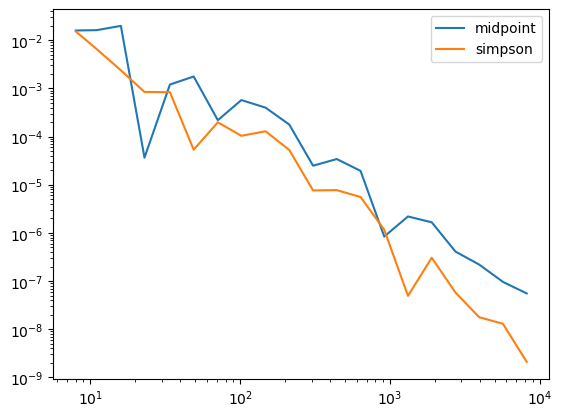

In [18]:
ns = np.logspace(3,13, num=20, dtype=int, base=2)
y1, y2 = [], []
for n in ns:
    a, b = I_x(0,6,np.pi,n)
    exact = (F(b)-F(a))
    y1.append(abs(midpoint(f, a, b, 1) - exact)) 
    y2.append(abs(simpson(f,a, b, 1) - exact))
plt.loglog(ns, y1, label="midpoint")
plt.loglog(ns, y2, label="simpson")
plt.legend()
ax = plt.gca()

In [19]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [20]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Quanto do erro de cada método é causado pelo erro em apenas um intervalo?

Faça um gráfico comparando esses erros

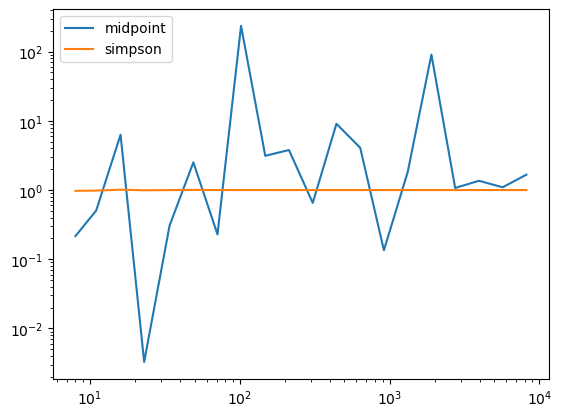

In [21]:
ns = np.logspace(3,13, num=20, dtype=int, base=2)
m1,m2, s1,s2 = [], [], [], []
for n in ns:
    a, b = I_x(0,6,np.pi,n)
    exact = (F(b)-F(a))
    m1.append(abs(midpoint(f, a, b, 1) - exact)) 
    s1.append(abs(simpson(f,a, b, 1) - exact))
a, b = 0, 6
exact = F(b)-F(a)
m2 = [abs(midpoint(f, a, b, n) - exact) for n in ns]
s2 = [abs(simpson(f,a, b, n) - exact) for n in ns]
y1 = [(m1[i])/m2[i] for i in range(len(ns))]
y2 = [(s1[i])/s2[i] for i in range(len(ns))]
plt.loglog(ns, y1, label="midpoint")
plt.loglog(ns, y2, label="simpson")
plt.legend()
ax = plt.gca()

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça um gráfico comparando os erros dos 4 métodos:
- Ponto médio vs Simpson
- Integral única vs Integral em 2 partes

Cuide de usar o mesmo número $n$ total de sub-intervalos, para não "roubar" em favor do que usa 2 intervalos :-)

In [22]:

exact = F(b) - F(a)

ns = np.logspace(3,13, num=20, dtype=int, base=2)
y1, y2, y3, y4 = [], [], [], []

for n in ns:
    a, b = I_x(0,6,np.pi,n)
    exact = (F(b)-F(a))
    y1.append(abs(midpoint(f, a, b, 1) - exact)) 
    y2.append(abs(simpson(f,a, b, 1) - exact))

a, c, b = 0, np.pi, 6
exact = (F(b)-F(a))
for n in ns:
    y3.append(abs(midpoint(f, a, c, n/2) + midpoint(f, a, c, n/2) - exact)) 
    y4.append(abs(simpson(f,a, c, n/2) + simpson(f,c, b, n/2) - exact))    
    
plt.loglog(ns, y1, label="midpoint integral única")
plt.loglog(ns, y2, label="simpson integral única")
plt.loglog(ns, y3, label="midpoint 2 partes")
plt.loglog(ns, y4, label="simpson 2 partes")
plt.legend()
ax = plt.gca()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4

O que você observa?
O que você conclui?

ambos método utilizados, quando calculada a integral por 2 partes, resultam em uma curva lisa, quando calculada por integral única, possuem algumas variações. No entando, o simpson em 2 partes é muito menor e decresce mais do que todos outros meios, diferente do midpoint em 2 partes, muito maior que todos outos. O ponto no qual o intervalo foi divido para calcular as integrais em 2 partes tem descontinuidade e, quando dividido, podemos evitá-la.